In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

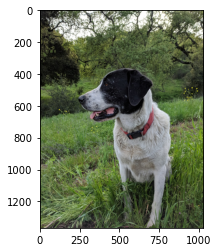

In [4]:
full_image = cv2.imread('../DATA/sammy.jpg')
full_image = cv2.cvtColor(full_image,cv2.COLOR_BGR2RGB)
plt.imshow(full_image);

In [5]:
full_image.shape

(1367, 1025, 3)

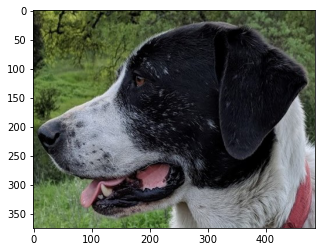

In [6]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face);

In [7]:
face.shape

(375, 486, 3)

In [10]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

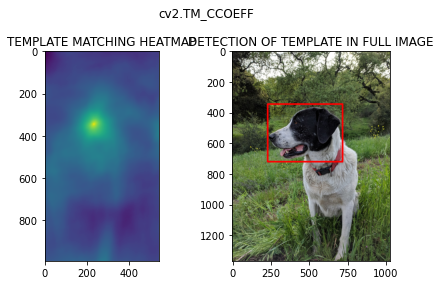

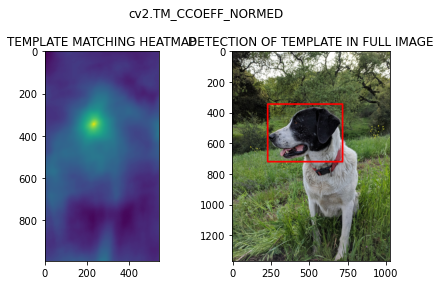

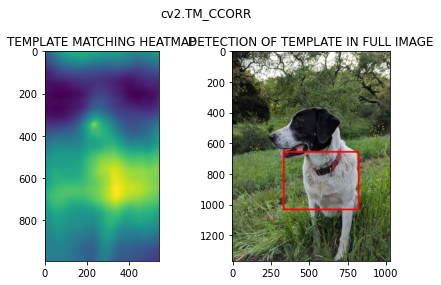

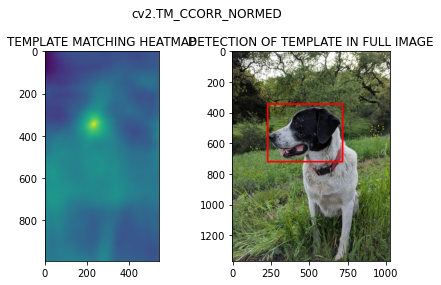

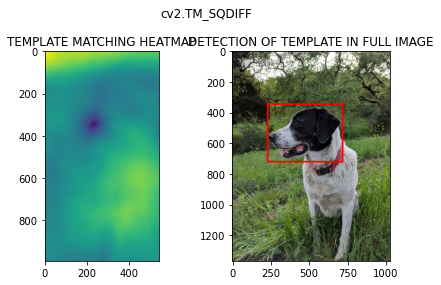

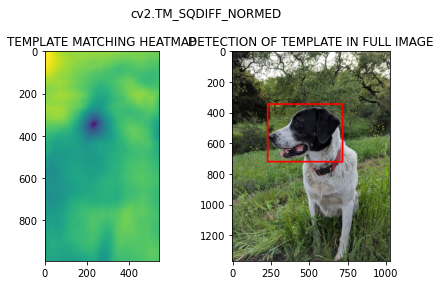

In [17]:
for m in methods:
    full_img_copy = full_image.copy()
    template_match_fn = eval(m)
    res = cv2.matchTemplate(full_img_copy,face,template_match_fn)
    min_val, max_val, min_pos, max_pos = cv2.minMaxLoc(res)
    if template_match_fn in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_pos
    else:
        top_left = max_pos
    height, width, channels = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_img_copy,top_left,bottom_right,(255,0,0),10)
    plt.subplot(121)
    plt.imshow(res)
    plt.title('TEMPLATE MATCHING HEATMAP')
    plt.subplot(122)
    plt.imshow(full_img_copy)
    plt.title('DETECTION OF TEMPLATE IN FULL IMAGE')
    plt.suptitle(m)   
    plt.tight_layout()
    plt.show()
    print('\n\n');